Symmetric spinning top: Este es un sistema física en 3D [2.3] que evidencia la naturaleza vectorial del momento angular y su relación con el torque que áctua en el sistema. Su descripción requiere las ecuaciones de Euler que relaciona la variación del momento angular y la forma más general de velocidad angular del sistema:
$$\frac{\mathrm{d} L}{\mathrm{d} t} = \Omega \times L$$
Sin embargo, para este problema se busca un enfoque más simple para construir la dinámica del trompo. Las ecuaciones de movimiento del trompo pueden ser derivadas desde la mecánica Lagrangiana (Libro de Marion). Omitiendo los detalles conceptuales necesarios en un curso de Mecánica, el lagrangiano que describe el sistema está dado por:  
$$L = \frac{1}{2}I_0 (\dot{\theta} ^2 + \dot{\phi} ^2 \sin(\theta)^2) + \frac{1}{2}I_z (\dot{\phi} \cos( \theta) + \dot{\psi})^2 - mgd\cos(\theta) $$  
donde $I_0 = \frac{1}{4}mr^2 + md^2$ es el momento de inercia alrededor de la dirección azimultal e $I_z = \frac{1}{2}mr^2 + md^2$ es el momento de inercia en la direccion de giro  del trompo \psi.

e) Usando los integradores de Scipy, integre el sistema de ecuaciones diferenciales

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym 
from scipy import integrate
from scipy.integrate import odeint
import matplotlib.animation as anim

In [9]:
t=np.linspace(0,8,10000)

d=0.3
g=9.81
m=0.1
r=0.1
d_psi=400
theta0 = np.pi*0.25
r_0=[0.,0.,theta0,0.]

I_z = 0.5*m*r**2
I_0=0.25*m*r**2+m*d**2
pphi = I_z*d_psi*np.cos(theta0)

In [12]:
def System(r_0,t):
    
    phi, psi, theta, dtheta = r_0
    
    dphi= (I_z*d_psi*(np.cos(theta0)-np.cos(theta)))/(I_0*np.sin(theta)**2+I_z*np.cos(theta)**2)
    
    val1 = dphi**2*np.sin(theta)*np.cos(theta)*(I_0-I_z)
    val2 = dphi*d_psi*I_z*np.sin(theta)
    val3 = m*g*d*np.sin(theta)
    d2theta= (val1-val2+val3)/I_0
    
    return [d_psi,dphi,dtheta,d2theta]

In [13]:
sol=odeint(System,r_0,t)
dpsi=sol[:,0]
dphi=sol[:,1]
dtheta=sol[:,2]
d2theta=sol[:,3]

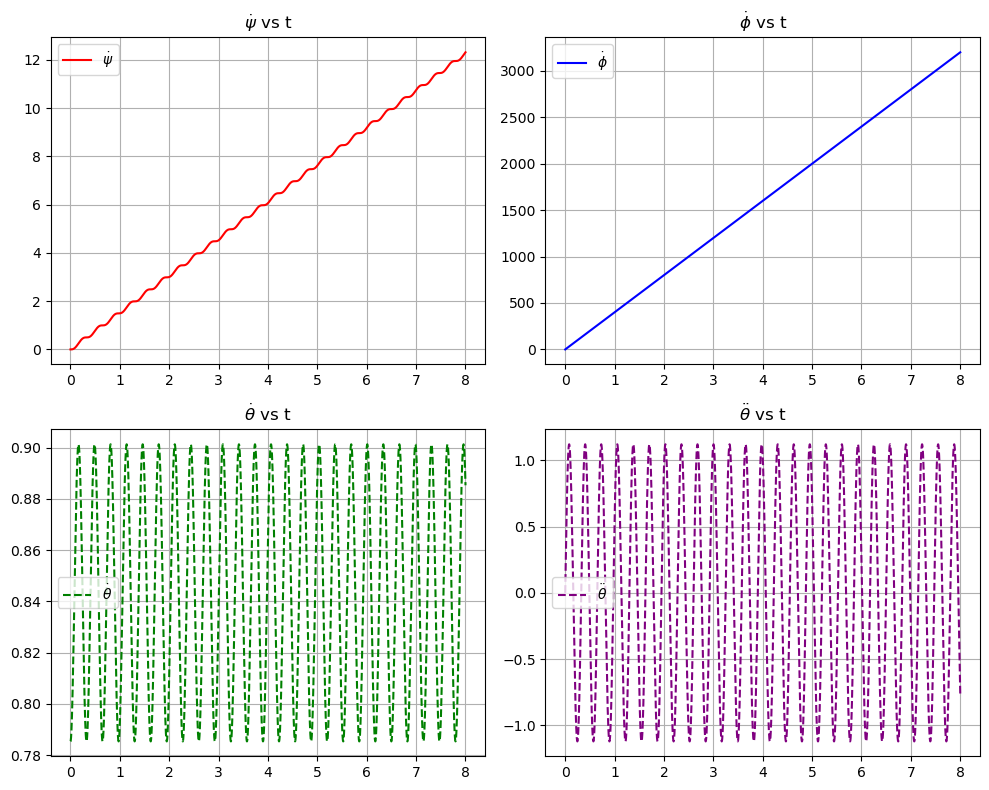

In [15]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

#1
axs[0, 0].plot(t, dphi, color="red", label='$\dot \psi$')
axs[0, 0].set_title('$\dot \psi$ vs t')
axs[0, 0].legend()
axs[0, 0].grid(True)

#2
axs[0, 1].plot(t,dpsi , color="blue", label='$\dot \phi$')
axs[0, 1].set_title('$\dot \phi$ vs t')
axs[0, 1].legend()
axs[0, 1].grid(True)

# 3
axs[1, 0].plot(t, dtheta, color="green", linestyle='--', label='$\dot θ$')
axs[1, 0].set_title('$\dot θ $ vs t')
axs[1, 0].legend()
axs[1, 0].grid(True)

axs[1, 1].plot(t, d2theta, color="purple", linestyle='--', label='$\ddot θ $')
axs[1, 1].set_title('$\ddot θ$ vs t')
axs[1, 1].legend()
axs[1, 1].grid(True)

plt.tight_layout()

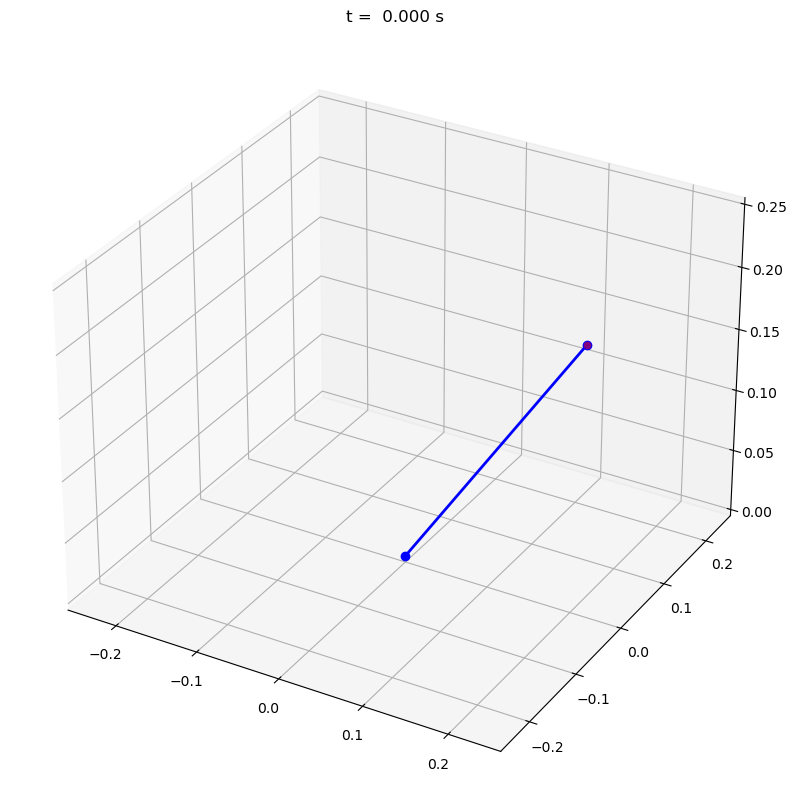

In [17]:
x_=np.zeros_like(t)
y_=np.zeros_like(t)
z_=np.zeros_like(t)

for i in range(len(t)):
    x_[i]=d*np.cos(dphi[i])*np.sin(dtheta[i])
    y_[i]=d*np.sin(dphi[i])*np.sin(dtheta[i])
    z_[i]=d*np.cos(dtheta[i])  
    
scale = 15
t1 = t[::scale]
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

def Update(i):
    
    ax.clear()
    ax.set_xlim(-0.25,0.25)
    ax.set_ylim(-0.25,0.25)
    ax.set_zlim(0,0.25)
    ax.set_title(r't =  %.3f s' %(t1[i]))
        
    x=x_[::scale][i]
    y=y_[::scale][i]
    z=z_[::scale][i]
    
    val_1 =x_[::scale][:i]
    val_2 =y_[::scale][:i]
    val_3 = z_[::scale][:i]
    
    ax.plot(val_1,val_2,val_3,color="purple", linestyle='--')    
    ax.scatter(x,y,z,c="purple")
    ax.plot([0,x], [0,y],[0,z], 'o-', lw=2,c="blue")
    
Animation = anim.FuncAnimation(fig,Update,frames=len(t1))

In [22]:
T_precesion=[]

for i in range(len(dphi)):
    
    if dphi[i]> 2*np.pi- 1e-3 and dphi[i]< 2*np.pi+1e-3:
        
        T_precesion.append(t[i])
    
    
T = np.mean(T_precesion)
print("El perido de la precesión del sistema es ", T )

El perido de la precesión del sistema es  4.082008200820082


In [21]:
v_prec=(dphi[-1]-dphi[0])/(t1[-1]-t1[0])

print("La velocidad de precesión del sistema es ", v_prec )

La velocidad de precesión del sistema es  1.5398956694726138
